In [42]:
import matplotlib.pyplot as plt
def plot_learning_curve_raw(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [43]:
def plot_learning_curve(history):
    plot_learning_curve_raw(history.history['loss'], 
                    history.history['val_loss'], 
                    history.history['accuracy'], 
                    history.history['val_accuracy'])

# Load training dataset of 3 classes and 4 classes

In [1]:
import cv2
import matplotlib.image as mplib 
from PIL import Image
import numpy as np
full_classes = ["epithelial","fibroblast","inflammatory","others"]
multiclass_train_path = "Image_classification_data/split_multi-task/train"

def load_data(labelNames, root):    
    images = list()
    labels = list()
    
    for label in labelNames:
        # get image directory
        img_dir = os.path.join(root, f"{label}")
        
        for img in os.listdir(img_dir):
            img = np.array(Image.open(os.path.join(img_dir, img),'r'))
            images.append(img)
            labels.append(label)
        
    return (images, labels)


In [3]:
from sklearn.model_selection import train_test_split
classes3 = ["epithelial","fibroblast","inflammatory"]
df3_x, df3_y = load_data(classes3, root=multiclass_train_path)

train3_x, val3_x, train3_y, val3_y = train_test_split(df3_x, df3_y,test_size=0.2, random_state=4)

In [4]:
from sklearn.model_selection import train_test_split
classes4 = ["epithelial","fibroblast","inflammatory", "others"]
df4_x, df4_y = load_data(classes4, root=multiclass_train_path)

train4_x, val4_x, train4_y, val4_y = train_test_split(df4_x, df4_y,test_size=0.2, random_state=4)

In [15]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
train3_y = coder.fit_transform(train3_y)
val3_y = coder.fit_transform(val3_y)

coder = LabelEncoder()
train4_y = coder.fit_transform(train4_y)
val4_y = coder.fit_transform(val4_y)

In [28]:
import pandas as pd
pd.DataFrame(train3_y).value_counts()

0    2617
2    1606
1    1222
dtype: int64

In [30]:
pd.DataFrame(train4_y).value_counts()

0    2625
2    1616
1    1200
3     891
dtype: int64

In [17]:
train3_x = np.array(train3_x)
train4_x = np.array(train4_x)

val3_x = np.array(val3_x)
val4_x = np.array(val4_x)
print("training: ",train3_x.shape)

training:  (5445, 27, 27, 3)


# Model for 3 classes

In [98]:
import tensorflow as tf
def get_subclass_model():
    """
        Structure of model classifying 3 classes
    """
    
    model = tf.keras.Sequential()
    # First convo-pooling
    # Convolutional layers (filter the image with a kernel)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=[27, 27, 3]))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    # Flatten input
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    # Output layer
    model.add(tf.keras.layers.Dense(3, activation="softmax"))
    # Compile model 
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model
    
def qget_subclass_model():
    """
        Structure of model classifying 3 classes
    """
    
    model = tf.keras.Sequential()
    # First convo-pooling
    # Convolutional layers (filter the image with a kernel)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=[27, 27, 3]))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    # Flatten input
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    # Output layer
    model.add(tf.keras.layers.Dense(3, activation="softmax"))
    # Compile model 
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [51]:
model3 = get_subclass_model()
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1152)              0         
                                                                 
 dense_20 (Dense)            (None, 256)              

In [52]:
hist3 = model3.fit(train3_x, train3_y, validation_data=(val3_x, val3_y), epochs=30, batch_size=128)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
43/43 [==============================] - ETA: 0s - loss: 4.7808 - accuracy: 0.4700WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa949918170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

In [53]:
model3.save_weights("results/model3(43-82).h5")

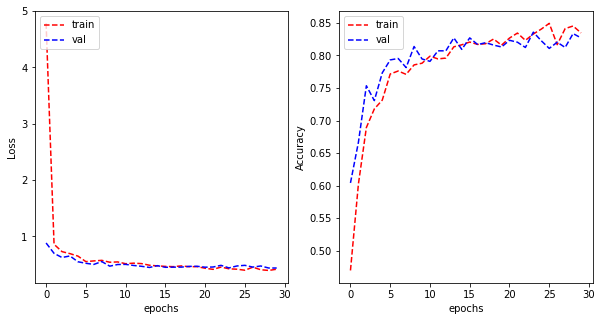

In [54]:
plot_learning_curve(hist3)

# Model for 4 classes

In [111]:
import tensorflow as tf
def get_multiclass_model():
    """
        Structure of model classifying 4 classes
    """
    
    model = tf.keras.Sequential()
    # First convo-pooling
    # Convolutional layers (filter the image with a kernel)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same",strides=1,activation="relu", input_shape=[27, 27, 3]))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
    
    # Second convo-pooling
    # Convolutional layers (filter the image with a kernel)
    model.add(tf.keras.layers.Conv2D(64, (3, 3),padding="same", activation="relu"))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2))
    
    # Flatten input
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    # Output layer
    model.add(tf.keras.layers.Dense(4, activation="softmax"))
    # Compile model 
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

def qget_multiclass_model():
    """
        Structure of model classifying 4 classes
    """
    
    model = tf.keras.Sequential()
    # First convo-pooling
    # Convolutional layers (filter the image with a kernel)
    model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=1,activation="relu", input_shape=[27, 27, 3]))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=1))
    
    # Second convo-pooling
    # Convolutional layers (filter the image with a kernel)
    model.add(tf.keras.layers.Conv2D(64, (3, 3),strides=1, activation="relu"))
    # Max-pooling layers (reduce the size of the image by choosing max pixel at certain area)
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=1))
    
    # Flatten input
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    # Output layer
    model.add(tf.keras.layers.Dense(4, activation="softmax"))
    # Compile model 
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [65]:
model4 = get_multiclass_model()
print(model4.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 27, 27, 64)        1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_40 (Dense)            (None, 128)             

In [66]:
hist4 = model4.fit(train4_x, train4_y, validation_data=(val4_x, val4_y), epochs=40, batch_size=128)

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
50/50 [==============================] - ETA: 0s - loss: 5.6453 - accuracy: 0.4097WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa9170cb830> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and 

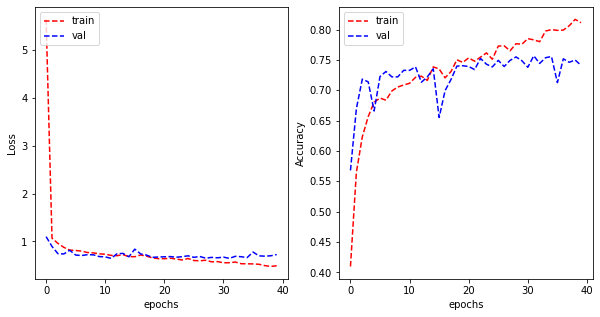

In [67]:
plot_learning_curve(hist4)

In [68]:
model4.save_weights("results/model4(72-74).h5")

# The meta-model

In [81]:
def get_meta_model():
    model = tf.keras.Sequential()
    # Flatten input
    model.add(tf.keras.layers.Flatten())
    # Hidden layers
    model.add(tf.keras.layers.Dense(1024, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(1024, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dense(4, activation="softmax"))
    # Compile model
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [73]:
pred3 = model3.predict(train4_x)
pred4 = model4.predict(train4_x)
train_34 =np.concatenate((pred3, pred4), axis=1)
print("Train dataset = pred3 + pred4: ", train_34.shape)

pred3 = model3.predict(val4_x)
pred4 = model4.predict(val4_x)
val_34 =np.concatenate((pred3, pred4), axis=1)
print("Val dataset = pred3 + pred4: ", val_34.shape)

Train dataset = pred3 + pred4:  (6332, 7)
Val dataset = pred3 + pred4:  (1583, 7)


In [82]:
meta_model = get_meta_model()
meta_model.fit(train_34, train4_y, validation_data=(val_34, val4_y), epochs=50, batch_size=32)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
194/198 [============================>.] - ETA: 0s - loss: 0.4398 - accuracy: 0.8557WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fa9376277a0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

## Quing's exact methods

In [114]:
def qget_transfer_model():
    model = tf.keras.Sequential()
    # Flatten input
    model.add(tf.keras.layers.Flatten())
    # Hidden layers
    model.add(tf.keras.layers.Dense(256, activation="relu"))
    model.add(tf.keras.layers.Dense(128, activation="softmax"))
    model.add(tf.keras.layers.Dense(32, activation="relu"))
    model.add(tf.keras.layers.Dense(3, activation="sigmoid"))
    # Output layer
    model.add(tf.keras.layers.Dense(4, activation="softmax"))
    # Compile model
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

In [112]:
qmodel3 = qget_subclass_model()
qmodel3.load_weights("results/subclass.h5")
qmodel4 = qget_multiclass_model()
qmodel4.load_weights("results/allclass.h5")

# Evaluation

In [5]:
from sklearn.metrics import classification_report
import numpy as np
def multiclass_classification_report(y_test, prediction):
    """
        Method to generate sklearn classification report with CNN multiclass output
    """
    
    encoded_pred = list()
    # convert each CNN output (sparse categorial) to class
    for pred in prediction:
        encoded_pred.append(np.argmax(pred))

    encoded_pred = np.array(encoded_pred)
    print(classification_report(y_test, encoded_pred))

In [136]:
df_test, df_test_label = load_data(["epithelial", "fibroblast", "inflammatory", "others"],root="Image_classification_data/split_multi-task/val")
coder.fit(["epithelial", "fibroblast", "inflammatory", "others"])
test_y = coder.transform(df_test_label)
test_x = np.array(df_test)

In [140]:
for i in range(4):
    print(f"No data in class {i} in data", (np.array(test_y)==i).sum())

No data in class 0 in data 816
No data in class 1 in data 378
No data in class 2 in data 509
No data in class 3 in data 278


## Nil Evaluation

In [137]:
pred3 = model3.predict(test_x)
pred4 = model4.predict(test_x)
test_34 =np.concatenate((pred3, pred4), axis=1)
print("Test dataset = pred3 + pred4: ", test_34.shape)


Test dataset = pred3 + pred4:  (1981, 7)


In [125]:
print("Evaluate Single CNN model for 4 classes: ")
multiclass_classification_report(test_y, pred4)

Evaluate Single CNN model for 4 classes: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       816
           1       0.71      0.62      0.66       378
           2       0.69      0.74      0.71       509
           3       0.54      0.39      0.45       278

    accuracy                           0.75      1981
   macro avg       0.69      0.67      0.68      1981
weighted avg       0.73      0.75      0.74      1981



In [86]:
pred_test = meta_model.predict(test_34)
multiclass_classification_report(test_y, pred_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       816
           1       0.70      0.65      0.68       378
           2       0.70      0.76      0.73       509
           3       0.50      0.43      0.46       278

    accuracy                           0.75      1981
   macro avg       0.69      0.68      0.69      198

## Quing Evaluation

In [141]:
def celltype_classify_data(class_list):    
    images = list()
    labels = list()
    root = "Image_classification_data"
    for i, label in enumerate(class_list):
        # get image directory
        img_dir = os.path.join("Image_classification_data/split_multi-task/val", f"{label}")
        
        for img in os.listdir(img_dir):
            img = cv2.imread(os.path.join(img_dir, img))
            # resize to 0-1 for faster computation
            resized = img / 255
            images.append(resized)
            labels.append(i)
        
    return (images, labels)

In [142]:
test_xx, test_yy = celltype_classify_data(["epithelial","inflammatory","fibroblast","others"])


In [145]:
qpred3 = qmodel3.predict(np.array(test_xx))
qpred4 = qmodel4.predict(np.array(test_xx))

qtest_34 =np.concatenate((qpred3, qpred4), axis=1)


In [146]:
multiclass_classification_report(test_y, qpred4)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       816
           1       0.03      0.03      0.03       378
           2       0.27      0.29      0.28       509
           3       0.66      0.72      0.69       278

    accuracy                           0.55      1981
   macro avg       0.47      0.48      0.48      1981
weighted avg       0.55      0.55      0.55      1981



In [147]:
qmeta_model = qget_transfer_model()
qmeta_model.build(input_shape = qtest_34.shape)
qmeta_model.load_weights("results/meta_learner.h5")

In [148]:
qpred_test = qmeta_model.predict(qtest_34)
multiclass_classification_report(test_y, qpred_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       816
           1       0.02      0.02      0.02       378
           2       0.25      0.26      0.25       509
           3       0.80      0.65      0.72       278

    accuracy                           0.56      1981
   macro avg       0.50      0.48      0.49      198

# Pseudo-labeling

In [87]:
import pandas as pd
extra_df = pd.read_csv("Image_classification_data/data_labels_extraData.csv")
extra_df.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [91]:
extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   InstanceID   10384 non-null  int64 
 1   patientID    10384 non-null  int64 
 2   ImageName    10384 non-null  object
 3   isCancerous  10384 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 324.6+ KB


In [94]:
extra_df.isCancerous.value_counts()

0    7394
1    2990
Name: isCancerous, dtype: int64

In [109]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

extra_x = datagen.flow_from_dataframe(extra_df, directory="Image_classification_data/patch_images",
x_col="ImageName",
target_size=(27,27),class_mode=None, batch_size=32)
for _ in range(int(10384 / 32) + 2):
    extrab_x= extra_x.next()
    print(extrab_x.shape)
b1 = extra_x.next()
# b2 = extra_x.next()

Found 10384 validated image filenames.
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(32, 27, 27, 3)
(

In [110]:
# for every batch
# use model34+meta to predict label of that batch of image
# merge that batch of image to train_x
# retrain model 3,4 and meta learner
# evaluate again with test set
b1.shape

(32, 27, 27, 3)